# Task-1
### Author -Devika Divakaran

# Task Purpose: Prediction using Supervised ML

● Problem statement:
Predict the percentage of an student based on the no. of study hours. 
What will be predicted score if a student studies for 9.25 hrs/ day?

# Step 1 - Importing the libraries

In [1]:
import pandas as pd
import numpy as np  
import seaborn as sns
import sklearn 
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings

# Step 2 - Data Collection

In [2]:
#Load the Dataset in jupyter notbook 
df = pd.read_csv("http://bit.ly/w-data")

# Step 3 - EDA 

In [3]:
#to See the first 5 rows of the data
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
#to See the last 5 rows of the data
df.tail() 

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
#to See the random 5 rows from dataframe
df.sample(5)

,Hours,Scores
8,8.3,81
6,9.2,88
11,5.9,62
20,2.7,30
16,2.5,30


In [6]:
#to find the count of column and count of rows
df.shape

(25, 2)

In [7]:
 #to know the actual size of data frames, like total values in df
df.size

50

In [8]:
#Check for information about data set
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 532.0 bytes


In [9]:
#Check for null values
df.isnull().sum()
#no missing value is found

Hours     0
Scores    0
dtype: int64

In [10]:
#Descreptive statistics of the data
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0.5, 1.0, 'No: hours studied v/s Score ')

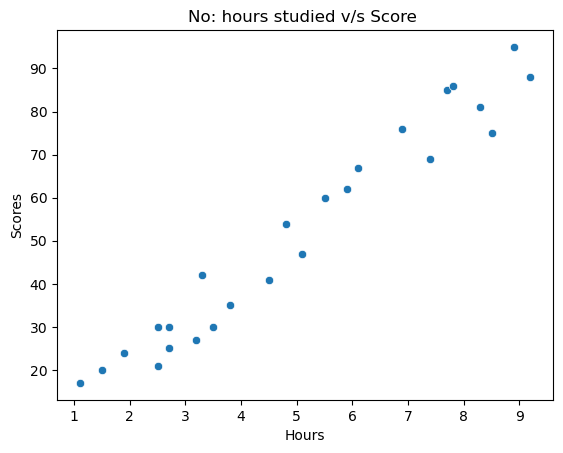

In [11]:
#finding out the relation between study hours and score aquired
sns.scatterplot(x=df["Hours"],y=df["Scores"])
plt.title("No: hours studied v/s Score ")

From the graph above, we can clearly see that there is a positive linear relation between the number of hours studied and percentage of score.

# Simple Liner Regression

In [12]:
x = df.drop("Scores",axis=1)  # independent variable 
y=df[["Scores"]] # dependent variable
xc=sm.add_constant(x) #constant

In [13]:
#Base model
model=sm.OLS(y,xc)
results=model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Scores   R-squared:                       0.953
Model:                            OLS   Adj. R-squared:                  0.951
Method:                 Least Squares   F-statistic:                     465.8
Date:                Tue, 16 Jan 2024   Prob (F-statistic):           9.13e-17
Time:                        21:58:06   Log-Likelihood:                -77.514
No. Observations:                  25   AIC:                             159.0
Df Residuals:                      23   BIC:                             161.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4837      2.532      0.981      0.337      -2.753       7.721
Hours          9.7758      0.453     21.583      0.000       8.839      10.713
==============================================================================
Omnibus:                        7.616   Durbin-Watson:                   1.460
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                2.137
Skew:                          -0.216   Prob(JB):                        0.343
Kurtosis:                       1.634   Cond. No.                         13.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Notes

R-square is 0.953,So 95.3 % of the variation in the score can be explained by the independent variable hours.
p-value of variable hours is <0.05 hence it is a significant predictor of Score.

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [14]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=0) 

Splitting data such that 20% data will be used for testing(model evaluation) and 80% data for model training.

# Model Training

In [15]:
from sklearn.linear_model import LinearRegression  
model = LinearRegression()  
model.fit(x_train, y_train) 

print("Training complete.")

Training complete.


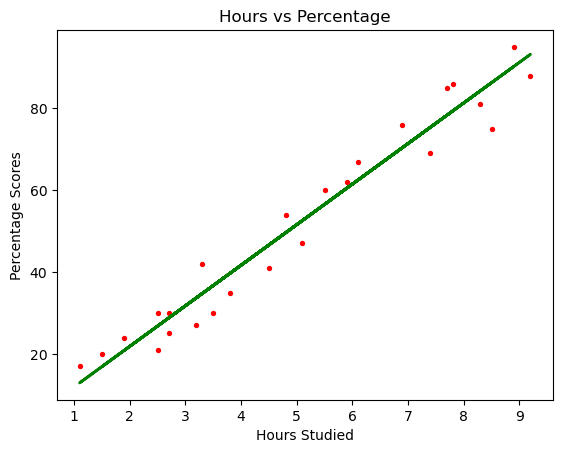

In [16]:
# Plotting the regression line
line = model.coef_*x+model.intercept_

# Plotting for the test data
plt.scatter(x, y,c='red', s=8)
plt.plot(x, line,c='green', lw=2)
plt.title('Hours vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Scores')  
plt.show()


# Predictions
Now that we have trained our algorithm, it's time to make some predictions.

In [17]:
print(x_test) # Testing data - In Hours

    Hours
5     1.5
2     3.2
19    7.4
16    2.5
11    5.9


In [18]:
y_pred = pd.DataFrame(model.predict(x_test),columns=["Predicted"]) # Predicting the scores
y_pred

,Predicted
0,16.884145
1,33.732261
2,75.357018
3,26.794801
4,60.491033


In [19]:
## Comparing Actual vs Predicted
y_test.reset_index(drop=True, inplace=True)
df= pd.concat([y_pred,y_test],axis=1)
df.rename(columns={"Scores":"Actual"})

,Predicted,Actual
0,16.884145,20
1,33.732261,27
2,75.357018,69
3,26.794801,30
4,60.491033,62


### **Evaluating the Model**

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [20]:
# Regression Evaluation Metrics:

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('r2_score:', metrics.r2_score(y_test, y_pred))

MAE: 4.183859899002975
MSE: 21.5987693072174
RMSE: 4.6474476121003665
r2_score: 0.9454906892105356


# Final Prediction - Percentage of a student who is studing  9.25 hours/day

In [26]:
# Predicting percentage of student who is studying 9.25 hrs/day
warnings.filterwarnings("ignore")
Hours=9.25
predicted_score = model.predict([[Hours]])
print(f"predicted score:{predicted_score[0][0]}")
warnings.filterwarnings("default")

predicted score:93.69173248737538


In [22]:
print('Predicted score if a student studies for 9.25 hrs/ day: ',predicted_score[0][0].round(2))

Predicted score if a student studies for 9.25 hrs/ day:  93.69


# Thank You!